# Morphology

**Overview**

Morphological measures of thickness, gyrification, and curvature are calculated within HippUnfold. Here we examine these to ensure they are consistent with previous work, and that they don't differ drastically between datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import hippomaps as hm

/export03/data/opt/venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
# config

useCheckpoints = True
if useCheckpoints:
    hm.fetcher.get_tutorialCheckpoints(['Morph-Histology.npy'])

hippunfold_dir = '/host/cassio/export03/data/unfolded_registration/hippunfold_v1.3.0_100um/hippunfold'

subs = ['bbhist', 'bbhist', 'pli3d', '122017', '122017', '152017', '152017']
ses = ''
hemis = ['L','R','L','R','L','L','R','L','R']
labels = 'hipp'
den='unfoldiso'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

features = ['thickness', 'gyrification', 'curvature']

## 0) Map and load volumetric data to surfaces

As in all tutorials here, this step is OPTIONAL, and will be skipped by default. It provides an example of how data can be mapped to hippocampal surfaces outside of python (using `wb_command`). This relies on having the data stored locally, and should be considered example code. This code may differ depending on where/how your data is stored and formatted, and so may require some customization for new projects. For the purposes of this tutorial, we provide a matrix of loaded data at the end, so skip to the next step.

In this example, we loop through samples (that is, subjects and hemipsheres) pulling hippunfold output features (that is, features intrinsic to the surfaces themselves, such as thickness).

In [3]:
if not useCheckpoints:
    morph_dat_hist = np.zeros([nV,len(subs),len(features)])*np.nan
    d=[]
    for f,feature in enumerate(features):
        for s,sub in enumerate(subs):
            d = nib.load(f'{hippunfold_dir}/sub-{sub}/surf/sub-{sub}_hemi-{hemis[s]}_space-corobl'\
                        f'_den-{den}_label-{labels}_{feature}.shape.gii')
            morph_dat_hist[:,s,f] = d.darrays[0].data
            if feature=='curvature':
                morph_dat_hist[:,s,f] = np.tanh(morph_dat_hist[:,s,f])
                if hemis[s]=="R":
                    morph_dat_hist[:,s,f] = -morph_dat_hist[:,s,f]
    np.save("checkpoints/Morph-Histology",morph_dat_hist, allow_pickle=True) 

## 1) Average across subjects and plot

### histology

/export03/data/opt/BrainSpace/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


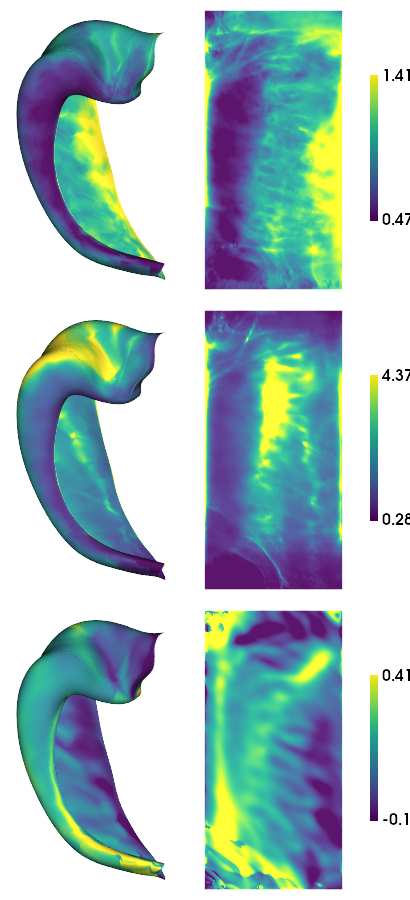

In [4]:
morph_dat_hist = np.load("checkpoints/Morph-Histology.npy")
hm.plotting.surfplot_canonical_foldunfold(np.mean(morph_dat_hist,axis=1), labels=labels, hemis=['L'], unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

### Ultra-high field MRI data at 7T

In [5]:
hippunfold_dir = '/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold'

subs = ['PNC002', 'PNC003', 'PNC006', 'PNC007', 'PNC009', 'PNC010', 'PNC015', 'PNC016', 'PNC018', 'PNC019']
ses = ''
hemis = ['L','R']
labels = ['hipp']#,'dentate'] 
den = '0p5mm'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

In [6]:
if not useCheckpoints:
    morph_dat_MRI7T = np.zeros([nV,2,len(subs),len(features)])*np.nan
    d=[]
    for h,hemi in enumerate(hemis):
        for l,label in enumerate(labels):
            for f,feature in enumerate(features):
                for s,sub in enumerate(subs):
                    try:
                        d = nib.load(f'{hippunfold_dir}/sub-{sub}/surf/sub-{sub}_hemi-{hemi}_space-T1w'\
                                    f'_den-{den}_label-{label}_{feature}.shape.gii')
                        morph_dat_MRI7T[iV[l],h,s,f] = d.darrays[0].data
                    except:
                        print(f'{sub} {feature} {label} not found')
    morph_dat_MRI7T[:,0,:,2] = -morph_dat_MRI7T[:,0,:,2]
    np.save("checkpoints/Morph-MRI7T",morph_dat_MRI7T, allow_pickle=True) 

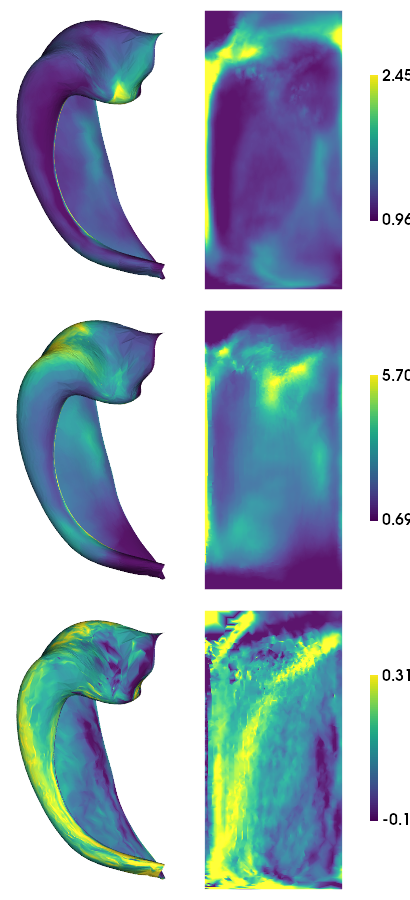

In [7]:
morph_dat_MRI7T = np.load("checkpoints/Morph-MRI7T.npy")
hm.plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI7T,axis=(1,2)), hemis=['L'], labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

### High-field MRI data at 3T

In [8]:
hippunfold_dir = '/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold'

subs = ['HC048', 'HC043', 'HC087', 'HC037', 'HC055', 'HC100', 'HC036', 'HC017', 'HC088', 'HC040', 'HC058', 'HC076', 'HC090', 'HC059', 'HC101', 'HC063', 'HC094', 'HC024', 'HC050',
 'HC080', 'HC013', 'HC026', 'HC001', 'HC084', 'HC105', 'HC083', 'HC042', 'HC014', 'HC033', 'HC081', 'HC106', 'HC108', 'HC095', 'HC002', 'HC102', 'HC028', 'HC020', 'HC049',
 'HC007', 'HC023', 'HC065', 'HC025', 'HC056', 'HC003', 'HC015', 'HC077', 'HC067', 'HC072', 'HC109', 'HC086', 'HC089', 'HC091', 'HC031', 'HC039', 'HC112', 'HC068', 'HC034',
 'HC032', 'HC060', 'HC047', 'HC103', 'HC046', 'HC009', 'HC097', 'HC116', 'HC053', 'HC079', 'HC029', 'HC075', 'HC078', 'HC057', 'HC018', 'HC074', 'HC064',
 'HC096', 'HC010', 'HC038', 'HC093', 'HC082', 'HC092', 'HC027', 'HC019', 'HC005', 'HC008', 'HC011', 'HC044', 'HC030', 'HC035', 'HC085', 'HC069', 'HC041', 'HC012', 'HC054', 'HC022', 'HC016', 'HC099',
 'HC073', 'HC052', 'HC045']
ses = 'ses-01'
hemis = ['L','R']
labels = ['hipp']#,'dentate'] 
den = '0p5mm'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

In [9]:
if not useCheckpoints:
    morph_dat_MRI3T = np.zeros([nV,2,len(subs),len(features)])*np.nan
    d=[]
    for h,hemi in enumerate(hemis):
        for l,label in enumerate(labels):
            for f,feature in enumerate(features):
                for s,sub in enumerate(subs):
                    try:
                        d = nib.load(f'{hippunfold_dir}/sub-{sub}/{ses}/surf/sub-{sub}_{ses}_hemi-{hemi}_space-T1w'\
                                    f'_den-{den}_label-{label}_{feature}.shape.gii')
                        morph_dat_MRI3T[iV[l],h,s,f] = d.darrays[0].data
                    except:
                        print(f'{sub} {feature} {label} not found')
    morph_dat_MRI3T[:,0,:,2] = -morph_dat_MRI3T[:,0,:,2]
    np.save("checkpoints/Morph-MRI3T",morph_dat_MRI3T, allow_pickle=True) 

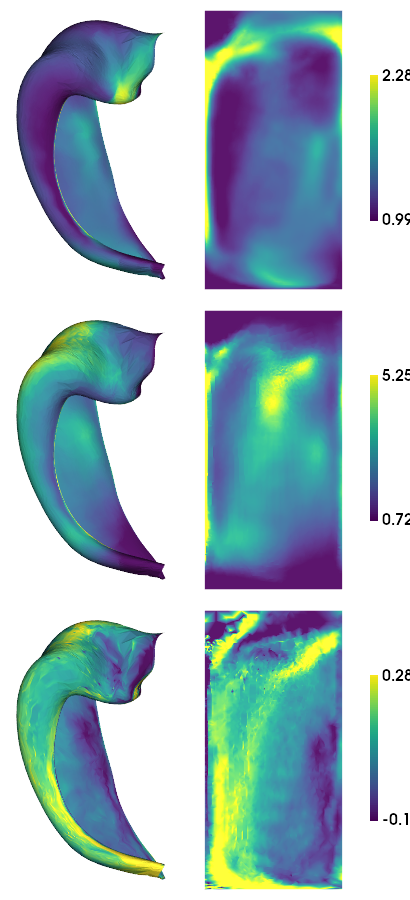

In [10]:
morph_dat_MRI3T = np.load("checkpoints/Morph-MRI3T.npy")
hm.plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI3T,axis=(1,2)), hemis=['L'], labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

**save**

In [11]:
# save 2D map
!mkdir -p ../maps/HippoMaps-initializationMaps/Dataset-MICs
for f,feature in enumerate(features):
    for h,hemi in enumerate(hemis):
        cdat = np.nanmean(morph_dat_MRI3T[iV[0],h,:,f],axis=1).flatten()
        data_array = nib.gifti.GiftiDataArray(data=cdat)
        image = nib.gifti.GiftiImage()
        image.add_gifti_data_array(data_array)
        nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-{feature}_average-99_hemi-{hemi}_den-0p5mm_label-hipp.shape.gii')

In [12]:
# save 2D map
!mkdir -p ../maps/HippoMaps-initializationMaps/Dataset-PNI
for f,feature in enumerate(features):
    cdat = np.nanmean(morph_dat_MRI7T[iV[0],:,:,f],axis=(1,2)).flatten()
    data_array = nib.gifti.GiftiDataArray(data=cdat)
    image = nib.gifti.GiftiImage()
    image.add_gifti_data_array(data_array)
    nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-{feature}_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii')

In [13]:
# save 2D map
!mkdir -p ../maps/HippoMaps-initializationMaps/Dataset-Mixed
for f,feature in enumerate(features):
    cdat = np.nanmean(morph_dat_hist[:,:,f],axis=1).flatten()
    data_array = nib.gifti.GiftiDataArray(data=cdat)
    image = nib.gifti.GiftiImage()
    image.add_gifti_data_array(data_array)
    nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-Mixed/histology-{feature}_average-7_hemi-mix_den-unfoldiso_label-hipp.shape.gii')